# Question 1

In [11]:

def sumDivisors (x):
    
    result = []
    
    for i in x:
        
        g= sum(x) - i
    
        result.append(g)

    return result

sumDivisors([2,3,4])


[7, 6, 5]

# Question 2

In [1]:
import pandas as pd

input_filename = "D:\\seek asia\\data job posts.csv"

data = pd.read_csv(input_filename, delimiter=',')


In [13]:
data.columns.values

array(['jobpost', 'date', 'Title', 'Company', 'AnnouncementCode', 'Term',
       'Eligibility', 'Audience', 'StartDate', 'Duration', 'Location',
       'JobDescription', 'JobRequirment', 'RequiredQual', 'Salary',
       'ApplicationP', 'OpeningDate', 'Deadline', 'Notes', 'AboutC',
       'Attach', 'Year', 'Month', 'IT'], dtype=object)

## Extract columns data 

In [17]:
extractedData = data[['Title', 'Duration' , 'Location' ,  'JobDescription' , 'JobRequirment' , 'RequiredQual' ,
                      'Salary' ,  'Deadline' , 'Company']]

In [28]:
data.date = pd.to_datetime(data.date, errors = 'coerce')
data.date = data.date.dt.strftime('%Y-%m-%d')

In [2]:
cleaned_data = data[~data.date.isin(['NaT'])]
cleanedData = data[['Title' , 'Location' ,  'JobDescription' , 'JobRequirment' , 'RequiredQual' ,
                     'ApplicationP',  'AboutC' , 'Company']]

In [43]:
twoYdata = cleaned_data[(cleaned_data['date'] <= '2015-1-1') & (cleaned_data['date'] >= '2013-1-1')]

## Identify the company with the most number of job ads in the past 2 years


In [50]:
twoYdata.groupby('Company')['date'].count().sort_values(ascending = False).head(1)

Company
ArmenTel CJSC    68
Name: date, dtype: int64

## Identify the month with the largest number of job ads over the years

In [61]:
data.date = pd.to_datetime(data.date, errors = 'coerce')
data['month'] = data.date.apply(lambda x: x.month)
    


In [65]:
data['Company'].groupby(data['month']).count().sort_values(ascending=False)

month
9.0     1649
10.0    1637
8.0     1613
7.0     1595
11.0    1573
3.0     1515
2.0     1499
12.0    1432
5.0     1411
4.0     1324
1.0     1269
6.0      180
Name: Company, dtype: int64

In [ ]:
from nltk.corpus import stopwords
import nltk
nltk.download()




## Data cleansing

In [3]:
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        word = unicode(word)
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
            

    return new_words

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def stem_words(words):
    """Stem words in list of tokenized words"""
    stemmer = LancasterStemmer()
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

#Singularize the word
def singular(X):
    
    results = []
    for i in X:
        m = singularize(str(i))
        results.append(m)
    return singular


def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    words = singular(words)
    return words



In [ ]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import unicodedata
import re
import inflect
from pattern.text.en import singularize

cleanedData['JobRequirment']= cleanedData['JobRequirment'].astype(str)
cleanedData['JobRequirment_token'] = cleanedData['JobRequirment'].apply(word_tokenize)


cleanedData['JobRequirment_tokenised']  = cleanedData['JobRequirment_token'].apply(normalize)

In [ ]:
cleanedData['Title']= cleanedData['Title'].astype(str)
cleanedData['Title_tokenised'] = cleanedData['Title'].apply(word_tokenize)

cleanedData['Title_tokenised']  = cleanedData['Title_tokenised'].apply(normalize)

cleanedData['JobDescription']= cleanedData['JobDescription'].astype(str)
cleanedData['JobDescription_tokenised'] = cleanedData['JobDescription'].apply(word_tokenize)

cleanedData['JobDescription_tokenised']  = cleanedData['JobDescription_tokenised'].apply(normalize)


cleanedData['RequiredQual']= cleanedData['RequiredQual'].astype(str)
cleanedData['RequiredQual_tokenised'] = cleanedData['RequiredQual'].apply(word_tokenize)

cleanedData['RequiredQual_tokenised']  = cleanedData['RequiredQual_tokenised'].apply(normalize)


## Removed NAN data

In [79]:
cleanedData = cleanedData[~cleanedData['JobDescription'].isin(['nan'])]
cleanedData = cleanedData[~cleanedData['JobRequirment'].isin(['an'])]

## Number of null 

In [34]:
data['Duration'].isnull().sum()

8203

In [43]:
cleanedData['Duration'] = data['Duration'].fillna('To be cofirmed')

In [82]:

def listTostring(x):
    
    X = ' '.join(map(str, x))
    
    return X

cleanedData['JobDescription_tokenised'] = cleanedData['JobDescription_tokenised'].apply(listTostring)

In [84]:
cleanedData['JobRequirment_tokenised'] = cleanedData['JobRequirment_tokenised'].apply(listTostring)

In [93]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np 

tvec = TfidfVectorizer(min_df=.0025, max_df=.1, stop_words='english')
tvec_weights_JobDescription = tvec.fit_transform(cleanedData['JobDescription_tokenised'].dropna())
weights_JobDescription = np.asarray(tvec_weights_JobDescription.mean(axis=0)).ravel().tolist()
weights_df_JobDescription = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights_JobDescription})
weights_df_JobDescription.sort_values(by='weight', ascending=False).head(20)



,term,weight
1076,software,0.026823
935,qualified,0.020464
1023,sales,0.020439
743,motivated,0.018796
1086,specialist,0.018650
335,developer,0.018347
186,cjsc,0.017450
325,design,0.016525
770,office,0.016280
915,projects,0.016115


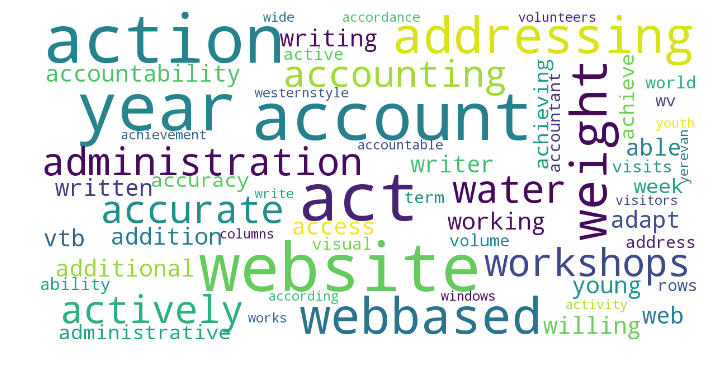

In [96]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

%matplotlib inline  

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
    
show_wordcloud(weights_df_JobDescription)

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np 

tvec = TfidfVectorizer(min_df=.0025, max_df=.1, stop_words='english')
tvec_weights_JobRequirment = tvec.fit_transform(cleanedData.JobRequirment_tokenised.dropna())
weights_JobRequirment = np.asarray(tvec_weights_JobRequirment.mean(axis=0)).ravel().tolist()
weights_df_JobRequirment = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights_JobRequirment})
weights_df_JobRequirment.sort_values(by='weight', ascending=False).head(20)



,term,weight
1756,sales,0.018875
535,customers,0.018656
125,applications,0.016931
1989,test,0.016268
22,accounting,0.015374
534,customer,0.014419
337,clients,0.013861
1196,marketing,0.013494
474,control,0.013336
1318,office,0.013324


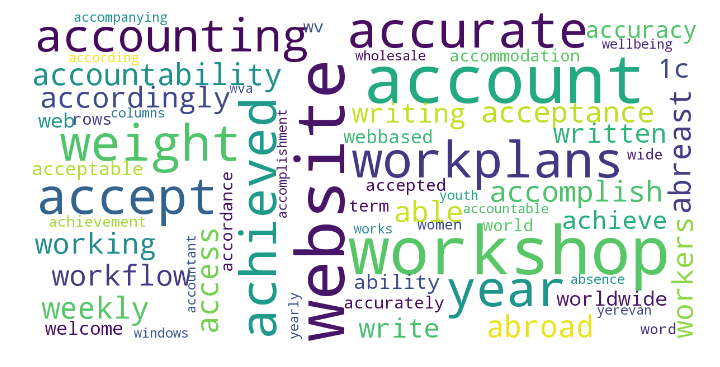

In [97]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

%matplotlib inline  

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords= {'to', 'of'} ,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=2 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
    
show_wordcloud(weights_df_JobRequirment)

In [101]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np 

cleanedData['RequiredQual_tokenised'] = cleanedData['RequiredQual_tokenised'].apply(listTostring)
tvec = TfidfVectorizer(min_df=.0025, max_df=.1, stop_words='english')
tvec_weights_RequiredQual = tvec.fit_transform(cleanedData.RequiredQual_tokenised.dropna())
weights_RequiredQual = np.asarray(tvec_weights_RequiredQual.mean(axis=0)).ravel().tolist()
weights_df_RequiredQual = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights_RequiredQual})
weights_df_RequiredQual.sort_values(by='weight', ascending=False).head(20)



,term,weight
854,marketing,0.018324
578,financial,0.017858
819,literacy,0.017787
142,banking,0.017585
147,basic,0.017022
1286,sense,0.016709
407,desirable,0.016533
896,minimum,0.016285
1544,web,0.015618
1079,preferable,0.015551


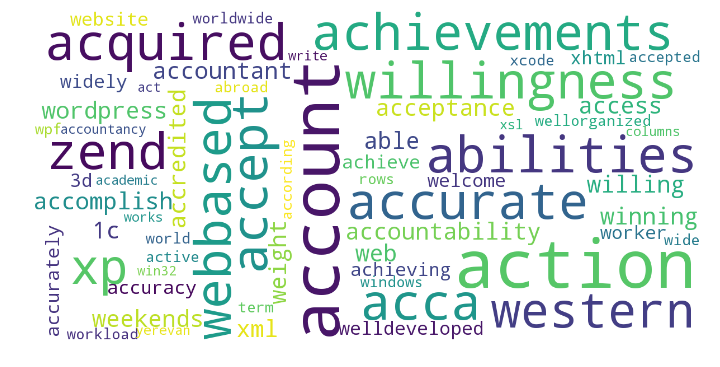

In [102]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

%matplotlib inline  

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords= {'to', 'of'} ,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=2 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
    
show_wordcloud(weights_df_RequiredQual)

In [104]:
cleanedData.columns

Index([u'Title', u'Location', u'JobDescription', u'JobRequirment',
       u'RequiredQual', u'ApplicationP', u'AboutC', u'Company',
       u'JobRequirment_token', u'JobRequirment_tokenised', u'Title_tokenised',
       u'JobDescription_tokenised', u'RequiredQual_tokenised'],
      dtype='object')

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np 

cleanedData['Title_tokenised'] = cleanedData['Title_tokenised'].apply(listTostring)
tvec = TfidfVectorizer(min_df=.0025, max_df=.1, stop_words='english')
tvec_weights_Title= tvec.fit_transform(cleanedData.Title_tokenised.dropna())
weights_Title = np.asarray(tvec_weights_Title.mean(axis=0)).ravel().tolist()
weights_df_Title = pd.DataFrame({'term': tvec.get_feature_names(), 'weight': weights_Title})
weights_df_Title.sort_values(by='weight', ascending=False).head(20)



,term,weight
65,engineer,0.052658
144,senior,0.044344
149,software,0.042728
18,assistant,0.038353
1,accountant,0.031065
141,sales,0.030713
127,project,0.025769
104,marketing,0.022959
114,officer,0.022464
51,department,0.019994


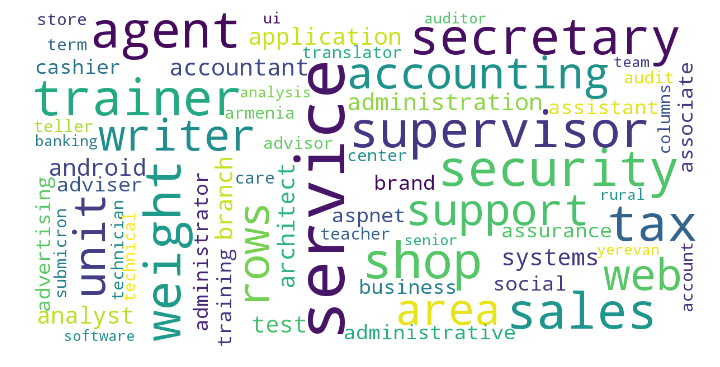

In [106]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

%matplotlib inline  

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords= {'to', 'of'} ,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=2 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()
    
    
show_wordcloud(weights_df_Title)

In [110]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline

count_vectorizer = CountVectorizer()

features_tokenised = cleanedData['RequiredQual_tokenised'] + ' '  + cleanedData['Title_tokenised']+ ' '  +cleanedData['JobRequirment_tokenised'] + ' '  +cleanedData['JobDescription_tokenised'] 


tfidf_matrix_all =  count_vectorizer.fit_transform(features_tokenised )
svd = TruncatedSVD(1000)
normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
Xnew = lsa.fit_transform(tfidf_matrix_all)

In [175]:
tvec_weights_all= tvec.fit_transform(features_tokenised)

Xvec = lsa.fit_transform(tvec_weights_all)

In [176]:
from sklearn.cluster import KMeans
XtwoFeatures = Xnew + Xvec

model = KMeans(n_clusters=100, init='k-means++', max_iter=100, n_init=1, verbose=False)
model.fit(XtwoFeatures)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=100,
    n_clusters=100, n_init=1, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=False)

In [178]:
vocab_frame =  cleanedData['Title']
terms = tvec.get_feature_names()

In [179]:
clusters = model.labels_.tolist()

films = { 'title': cleanedData['Title'].values,'cluster': clusters}

frame = pd.DataFrame(films, index = [clusters],columns = ['title' , 'cluster'])

# Semantic Analysis

In [186]:
from __future__ import print_function
num_clusters = 100
order_centroids = model.cluster_centers_.argsort()[:, ::-1] 
clusters = model.labels_.tolist()

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    
    for ind in order_centroids[i, :20]: #replace 6 with n words per cluster
        print(' %s' % (vocab_frame.ix[terms[ind].split(' ')].index.tolist()[0].encode('utf-8', 'ignore')), end=',')
        
    print() #add whitespace
    print() #add whitespace
    
    print("Cluster %d titles:" % i, end='')
    for title in np.unique(frame.ix[i]['title'].values.tolist()):
        print(' %s,' % title, end='')
    print() #add whitespace
    print() #add whitespace
    print()
print()
print()

Cluster 0 words: 1c, achieved, achieve, achievement, accountable, able, apply, accountants, applicants, arising, achieving, amendments, accountant, actors, apache, action, acca, anticipated, addressed, arranging,

Cluster 0 titles: Accidents Registration Unit Specialist, Actuary, Assistant Underwriter, Call Center Specialist, Claim Adjuster, Claim Settlement Specialist/ Lawyer, Claims Adjuster, Claims Administrator, Claims Assistant, Claims Specialist, Coordinator 1, Coordinator 2, Credit/ Insurance Registry Specialist, Statistics Department, Customer Service Representative, Customer Service Supervisor, Damage Appraiser, Debtor Manager, Deputy Executive Director of Medical Insurance Department, Doctor-Expert, Doctor/ Expert, Executive Director, Executive Manager, Finance/ Banking Consultants, Financial Analyst, Financial Products Specialist, Financial Sector Expert, Head of Agents' Network Unit, Head of Claims Department, Head of Retail Unit, Underwriting Department, IT Specialist, Ins